<a href="https://colab.research.google.com/github/akr1139/CO542_LAB_07/blob/main/e17285_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical

### 1. Import the CIFER-10 data set using keras.datasets.

In [3]:
#download cifar10 data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


### 2. Study the shapes of the training and testing datasets.

In [5]:
#check image shape
print(f"shape of the train image : {X_train[0].shape}")
print(f"shape of the test image : {X_test[0].shape}")

shape of the train image : (32, 32, 3)
shape of the test image : (32, 32, 3)


### 3. Visualize some images in the train and test tests to understand the dataset.
You may use matplotlib.pyplot.imshow to display the images in a grid

train images


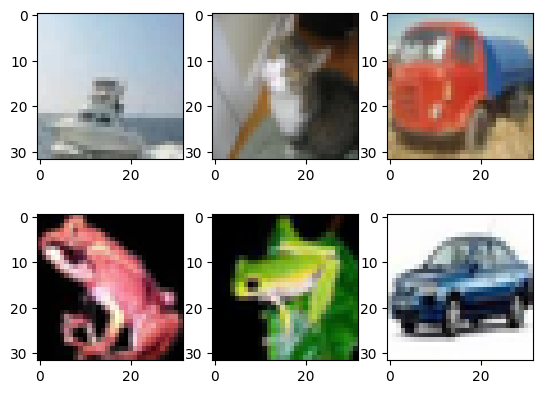

In [6]:
#plot some images in the train dataset
print("train images")
for i in range(6):

  plt.subplot(2, 3, i+1)
  plt.imshow(X_train[i+100])





test images


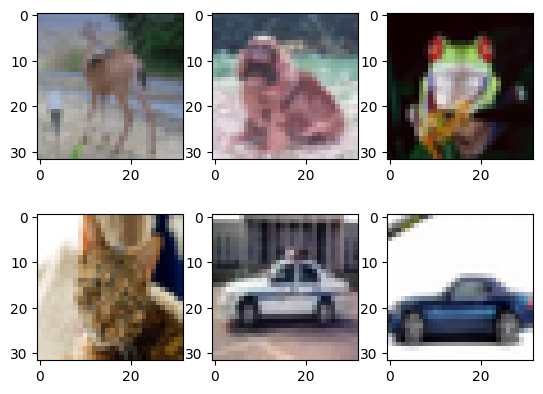

In [7]:
#plot some images in the test dataset
print("test images")
for i in range(6):

  plt.subplot(2, 3, i+1)
  plt.imshow(X_test[i+100])



### 4. Under the data pre-processing procedures,

• Reshape the input datasets accordingly.

• Normalize the pixel values in a range between 0 to 1.

• Convert the class labels into One-Hot encoding vector. Clearly mention the requirement of this conversion.

• Use sklearn.model selection.train test split to further split the training dataset into validation
and training data (e.g. allocate 0.2 of the training set as validation data).


In [8]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],X_train[0].shape[0],X_train[0].shape[0],3)
X_test = X_test.reshape(X_test.shape[0],X_test[0].shape[0],X_test[0].shape[0],3)

In [9]:
#normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

In [10]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
#plit the dataset for training and validation purposes
train_X, valid_X, train_label, valid_label = train_test_split(X_train,y_train,test_size=0.2,random_state=13)

### 5.Build the CNN model with three convolutional layers followed by a dense layer and an output layer

accordingly. In this case,

• Select 3 X 3 as the kernal size of each filter.

• Use different number of filters in each convolutional layer (e.g. first layer 32 filters, second layer 64 filters, third layer 128 filters).

• Use LeakyReLU as the activation function. Mention the advantage of using LeakyReLU over ReLU activation function.

• Use 2 X 2 MaxPooling layers, and Dropout layers according to the requirements and mention the purpose behind the usage of Dropout Layers.


In [12]:
#build the CNN model
model = Sequential()

#add model layers

#convolution layers
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation=LeakyReLU(alpha=0.3),input_shape=X_train[0].shape))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

### 6. Compile the model using appropriate parameters and generate the model summery using model.summary() function (In this case make sure to specify the metrics as accuracy).


In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

### 7. Train the compiled model using model.fit function and observe the train and validation set performances. In this case, you may have to select an appropriate number of epochs (e.g. 25) and batch size (e.g. 64, 128 or 256).

In [16]:
#train the model
model.fit(train_X, train_label, validation_data=(valid_X, valid_label),epochs=25,batch_size=64)

Epoch 1/25
625/625 [==============================] - 75s 115ms/step - loss: 1.6223 - accuracy: 0.4119 - val_loss: 1.3254 - val_accuracy: 0.5317
Epoch 2/25
625/625 [==============================] - 69s 110ms/step - loss: 1.2391 - accuracy: 0.5618 - val_loss: 1.0859 - val_accuracy: 0.6248
Epoch 3/25
625/625 [==============================] - 70s 112ms/step - loss: 1.0983 - accuracy: 0.6148 - val_loss: 1.0661 - val_accuracy: 0.6258
Epoch 4/25
625/625 [==============================] - 69s 110ms/step - loss: 1.0164 - accuracy: 0.6465 - val_loss: 0.9859 - val_accuracy: 0.6642
Epoch 5/25
625/625 [==============================] - 68s 109ms/step - loss: 0.9691 - accuracy: 0.6650 - val_loss: 0.9029 - val_accuracy: 0.6916
Epoch 6/25
625/625 [==============================] - 69s 111ms/step - loss: 0.9238 - accuracy: 0.6793 - val_loss: 0.8637 - val_accuracy: 0.6979
Epoch 7/25
625/625 [==============================] - 71s 113ms/step - loss: 0.8860 - accuracy: 0.6928 - val_loss: 0.8249 - val_ac

### 8. Evaluate the model performance using test set. Identify the test loss and test accuracy.

In [17]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_eval[0])
print("Test accuracy:", test_eval[1])

Test loss: 0.7318944334983826
Test accuracy: 0.7544999718666077


### 9. Use the trained model to make predictions for the test data and visualize the model performance under each class using sklearn.metrics.classification report.

In [18]:
predictions = model.predict(X_test)
predictions = np.argmax(np.round(predictions),axis=1)
predictions[:5]

313/313 [==============================] - 6s 19ms/step


array([3, 8, 8, 8, 6])

In [19]:
print(classification_report(np.argmax(np.round(y_test),axis=1), predictions))

              precision    recall  f1-score   support

           0       0.37      0.72      0.49      1000
           1       0.91      0.86      0.88      1000
           2       0.69      0.62      0.65      1000
           3       0.72      0.45      0.55      1000
           4       0.76      0.70      0.73      1000
           5       0.80      0.59      0.68      1000
           6       0.84      0.80      0.82      1000
           7       0.87      0.73      0.79      1000
           8       0.79      0.90      0.84      1000
           9       0.84      0.84      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.73     10000
weighted avg       0.76      0.72      0.73     10000

